In [141]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import  Dropout, Input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [197]:
#dir = 'd:\\Java\\Datasets\\Jano\\kvety\\'
#classes=['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
dir = 'd:\\Java\\Datasets\\Jano\\mix1\\'
classes=['bikes', 'flowers', 'people']

In [207]:
train_path = dir+'\\training'
valid_path = dir+'\\validation'
test_path = dir+'\\testing'
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=classes, batch_size=16)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=classes, batch_size=16)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=classes, batch_size=16)

Found 35 images belonging to 3 classes.
Found 13 images belonging to 3 classes.
Found 3 images belonging to 3 classes.


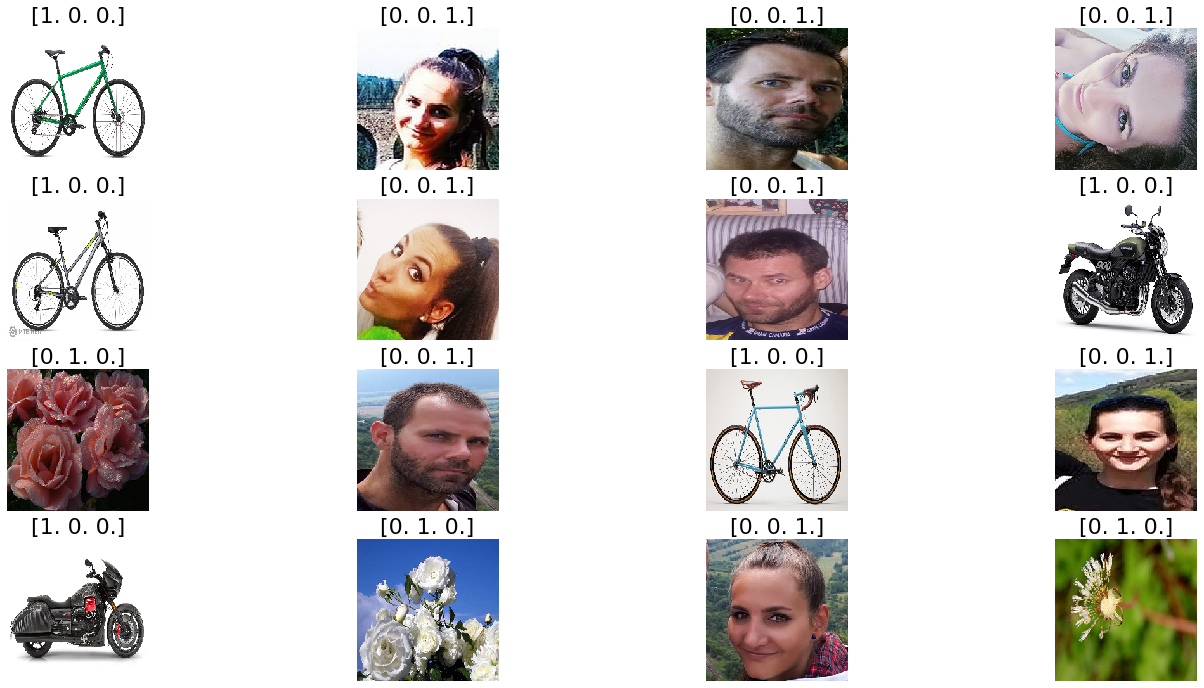

In [208]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(24,12), rows=4, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=22)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
imgs, labels = next(train_batches)
plots(imgs, titles=labels)

In [209]:
vgg16_model = tensorflow.keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224,224,3)))

In [210]:
for layer in vgg16_model.layers[:-4]:
    layer.trainable = False

In [211]:
# Create the model
model = Sequential()
 
# Add the vgg convolutional base model
model.add(vgg16_model)
 
# Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(classes), activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 3075      
Total params: 40,408,899
Trainable params: 32,773,635
Non-trainable params: 7,635,264
_________________________________________________________________


In [212]:
model.compile(loss='categorical_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
history = model.fit_generator(
      train_batches,
      steps_per_epoch=train_batches.samples/train_batches.batch_size ,
      epochs=5,
      validation_data=valid_batches,
      validation_steps=valid_batches.samples/valid_batches.batch_size,
      verbose=1)

Train for 2.1875 steps, validate for 0.8125 steps
Epoch 1/5
3/2 [=========================================] - 14s 5s/step - loss: 13.7282 - acc: 0.6571 - val_loss: 6.4894e-06 - val_acc: 1.0000
Epoch 2/5
3/2 [=========================================] - 14s 5s/step - loss: 1.0466 - acc: 0.9143 - val_loss: 0.0036 - val_acc: 1.0000
Epoch 3/5
3/2 [=========================================] - 16s 5s/step - loss: 0.3945 - acc: 0.9714 - val_loss: 2.2572e-08 - val_acc: 1.0000
Epoch 4/5
3/2 [=========================================] - 17s 6s/step - loss: 5.7810e-07 - acc: 1.0000 - val_loss: 9.0289e-08 - val_acc: 1.0000
Epoch 5/5
3/2 [=========================================] - 18s 6s/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 9.0289e-08 - val_acc: 1.0000


In [213]:
test_imgs, test_labels = next(test_batches)
predictions = model.predict(test_imgs)

In [214]:
test_labels

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [215]:
predictions

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [2.2809756e-08, 9.9999762e-01, 2.3608877e-06],
       [1.1604865e-20, 5.9678554e-24, 1.0000000e+00]], dtype=float32)

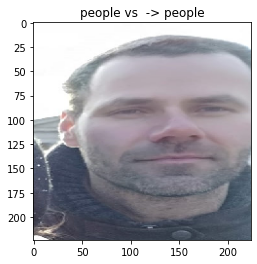

In [218]:
index = 2
ims = np.array(test_imgs[index]).astype(np.uint8)
final_1=np.argmax(predictions,axis=1)[index]
#plt.title('Actual  ' + test_labels[0] + 'Predicted ' + classes[final_1])
#plt.title(label = 'Actual  ' + test_labels[0] + 'Predicted ' + classes[final_1])
actual=np.argmax(test_labels,axis=1)[index]
actual_str = classes[actual]
plt.title( actual_str + ' vs  -> ' + classes[final_1])
plt.imshow(ims)


In [220]:
correct=0
wrong=0
for i in range(len(classes)):
    if(np.argmax(test_labels,axis=1)[i]== np.argmax(predictions,axis=1)[i]):
        correct+=1
    else:
        wrong+=1
print('Correct vs Wrong' , correct , " : " , wrong )
print('Accuracy' , (correct/(correct+wrong) * 100))

Correct vs Wrong 3  :  0
Accuracy 100.0
